In [7]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##### Load Data and Perform Exploratory Data Analysis

In [8]:
# Read data and Make a copy
df = pd.read_csv('music_dataset_mod.csv')
# Create a copy so that original data is intact
df_music_realistic = df.copy()

In [9]:
df_music_realistic

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [10]:
# Columns and identify missing values
df_music_realistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [11]:
# get some statistics of the data
df_music_realistic.describe()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700
max,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,140.031079,99.586429,100.000000,99.820903,99.958673


In [12]:
#Unique values of the target variable
df_music_realistic['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

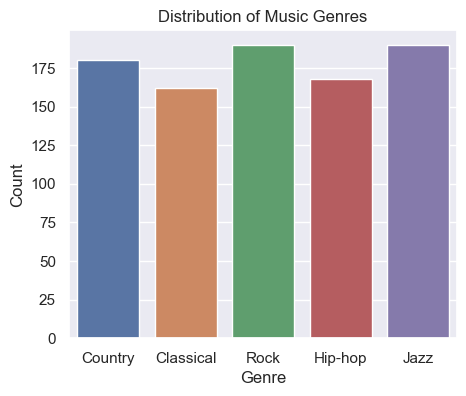

In [13]:
#Distribution of the target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='Genre', data=df_music_realistic)
plt.title('Distribution of Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

##### Correlation Analysis

In [14]:
# Remove missing data
df_music_realistic_nonull = df_music_realistic.dropna()
df_music_realistic_nonull

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


In [15]:
#Divide dataset into features and targets and assign the features to a
#variable named 'X' and the target to a variable named 'y'
X = df_music_realistic_nonull.drop(columns=['Genre'])
y = df_music_realistic_nonull['Genre']

In [16]:
# Encode the target labels to convert the categorical Genre 
#values into numerical form
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [17]:
y_encoded

array([1, 0, 4, 2, 1, 4, 2, 1, 1, 1, 0, 2, 2, 4, 2, 4, 3, 0, 4, 2, 1, 0,
       1, 3, 3, 4, 3, 4, 2, 1, 4, 1, 4, 0, 0, 3, 0, 3, 4, 0, 3, 1, 3, 1,
       2, 1, 4, 1, 4, 0, 1, 1, 0, 3, 2, 4, 4, 1, 2, 0, 1, 1, 0, 3, 1, 3,
       4, 2, 2, 3, 0, 2, 1, 3, 2, 2, 0, 2, 3, 1, 0, 4, 3, 2, 0, 2, 3, 1,
       1, 0, 4, 1, 3, 2, 3, 4, 1, 1, 4, 0, 0, 1, 3, 3, 4, 4, 2, 0, 0, 1,
       3, 4, 3, 2, 3, 1, 0, 2, 1, 0, 2, 4, 4, 3, 1, 2, 4, 1, 2, 1, 2, 1,
       0, 2, 1, 2, 4, 3, 2, 1, 3, 1, 4, 1, 0, 1, 2, 2, 2, 1, 1, 2, 3, 4,
       1, 2, 2, 4, 4, 2, 0, 3, 4, 4, 1, 4, 1, 2, 3, 0, 3, 4, 4, 4, 3, 0,
       4, 0, 4, 3, 3, 2, 3, 4, 0, 1, 1, 4, 3, 2, 1, 1, 3, 2, 4, 1, 0, 2,
       1, 4, 0, 2, 2, 4, 0, 2, 3, 0, 0, 2, 4, 2, 3, 3, 4, 2, 3, 1, 1, 0,
       3, 2, 4, 3, 2, 3, 1, 4, 3, 3, 0, 3, 4, 3, 0, 4, 4, 3, 1, 1, 4, 0,
       3, 2, 3, 3, 1, 0, 3, 1, 3, 4, 3, 3, 2, 1, 3, 2, 0, 4, 4, 1, 3, 2,
       3, 4, 1, 3, 4, 3, 1, 0, 4, 3, 0, 2, 2, 0, 4, 2, 4, 2, 1, 1, 0, 3,
       2, 4, 2, 1, 3, 4, 1, 2, 0, 4, 2, 4, 3, 3, 4,

In [18]:
#Replace the original Genre column in a new DataFrame copy with the numerically 
#encoded genre data
df_with_encoded_genre = df_music_realistic_nonull.copy()
df_with_encoded_genre.drop(columns=['Genre'], inplace=True)
df_with_encoded_genre['Genre_encoded'] = y_encoded
df_with_encoded_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,2
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


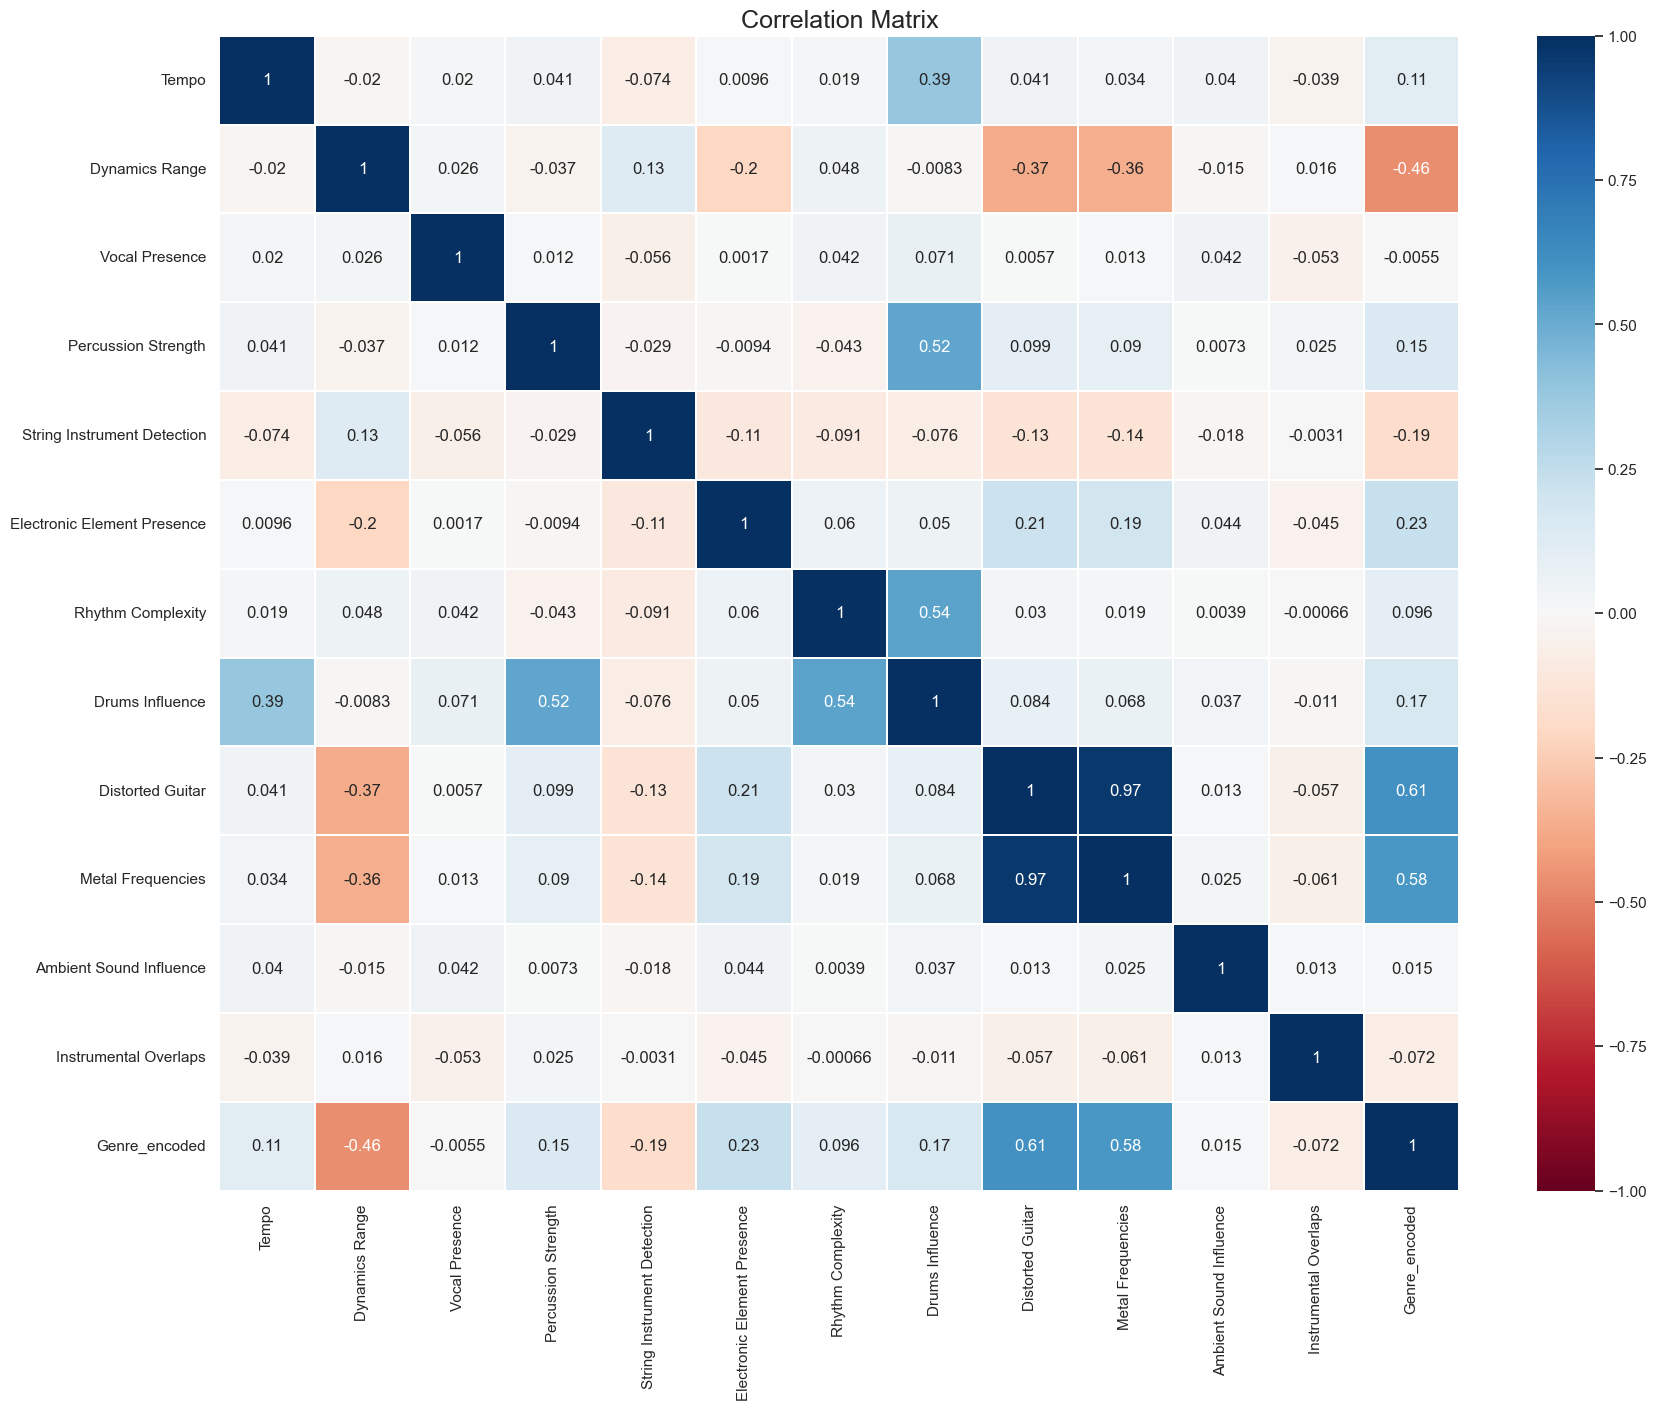

In [19]:
# Correlation Matrix
correlation_matrix = df_with_encoded_genre.corr()
plt.figure(figsize=(20, 15))

sns.heatmap(correlation_matrix,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap="RdBu",
            linewidths=0.1)
plt.title("Correlation Matrix", fontsize=18)
plt.yticks(rotation=0)

plt.show()

Some variables are highly correlated such as  Distorted Guitar and Metal Frequencies. We will
perform Pricipal Component Analysis. PCA can assist in reducing 
redundancy by transforming correlated musical features into a set of 
linearly uncorrelated variables or principal components. 
Reducing dimensionality can drastically improve the performance 
of classification algorithms by eliminating noise.

##### PCA for Dimensionality Reduction

In [20]:
#Use the StandardScaler() from sklearn to standardize data. 
# Then, apply the fit_transform() method 
#and store the standardized features in a variable called X_scaled.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
#Fit the transformed X_scaled data into the PCA() model
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.0572597 ,  0.28161626,  0.62342202, ...,  0.74994362,
        -0.41133069, -0.20089952],
       [ 1.86454175,  2.72389526, -0.06110915, ..., -0.46808373,
        -0.06524083, -0.03262838],
       [-1.86197335,  0.0390771 ,  0.30639382, ...,  1.12924615,
        -0.20497339,  0.13108671],
       ...,
       [-0.41959195, -2.19097097,  1.57481878, ...,  0.61746001,
         0.86535466,  0.11015801],
       [-0.59721268, -2.33887467, -0.91433944, ..., -0.92203511,
        -0.11584256, -0.27384145],
       [ 0.33474784, -0.75956161,  0.16804437, ..., -0.96472679,
        -0.77845888,  0.16213001]])

In [31]:
#Calculate the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

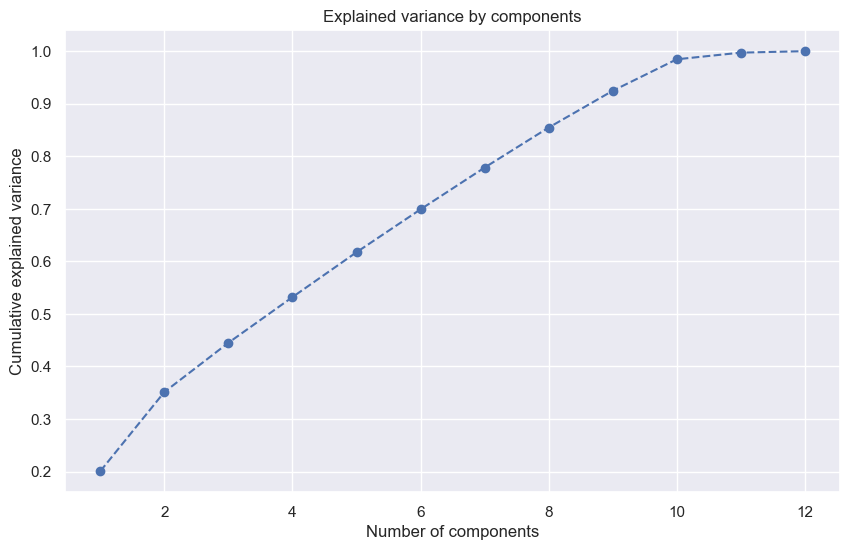

In [23]:
#Visualize the explained variance against the number of principal components 
plt.figure(figsize=(10,6))
plt.plot(range(1,13),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

From the above chart, if we select 8 prinicipal components we can capture more than 80% of the variance of the dataset.

In [29]:
# Perform PCA again by defining n_components = 8 
#and transform  scaled data with this PCA model.
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
X_pca


array([[-1.0572597 ,  0.28161626,  0.62342202, ...,  1.05439349,
         0.24994853, -0.27158679],
       [ 1.86454175,  2.72389526, -0.06110915, ...,  1.34651169,
         1.06142384,  0.17034065],
       [-1.86197335,  0.0390771 ,  0.30639382, ...,  0.29362059,
         0.66875032,  0.49138804],
       ...,
       [-0.41959195, -2.19097097,  1.57481878, ..., -0.10027041,
         0.47496282, -1.95550656],
       [-0.59721268, -2.33887467, -0.91433944, ...,  0.13583326,
         0.02134544,  0.88701971],
       [ 0.33474784, -0.75956161,  0.16804437, ...,  2.28079533,
        -1.54104915,  1.21769653]])

##### Comparing Classification- PCA Transformed Vs. Original data

In [32]:
#Split the transformed data and the encoded target variable into 
#training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)


In [33]:
#Applying Logistic Regression on PCA trnasformed data
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
classifier.coef_

array([[ 3.29440053,  0.98553842, -0.02455194,  0.16624906, -0.19796879,
        -0.14758215,  0.20162682,  0.01722755,  0.19684968, -0.25214434,
         0.11672201,  1.89928647],
       [-0.41339077, -0.37090997,  0.02513391,  0.14516532, -0.00345451,
         0.31761521,  0.01876606, -0.1243841 , -0.12505622,  0.13499973,
         0.3638648 , -0.65925188],
       [-0.74437046, -0.25322529, -0.12713605, -0.32146369, -0.06722623,
        -0.32156509,  0.01733285,  0.55667261, -0.1894352 ,  0.46782449,
        -0.21608734,  0.10160793],
       [-0.55195667,  0.08556411, -0.31216771, -0.34669177,  0.41109819,
         0.31326699, -0.30531574, -0.33319912,  0.10556637, -0.1542854 ,
        -0.07226469, -0.28948297],
       [-1.58468263, -0.44696726,  0.4387218 ,  0.35674108, -0.14244867,
        -0.16173495,  0.06759001, -0.11631694,  0.01207536, -0.19639449,
        -0.19223477, -1.05215955]])

In [34]:
#Accuracy score and classification report-PCA transformed dataset
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5280898876404494

Classification Report:
               precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



In [35]:
# Carry out same process with the Original dataset
#split data set
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [36]:
#Accuracy score and classification report -Original dataset
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

Accuracy with Original Features: 0.5280898876404494

Classification Report with Original Features:
               precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.33      0.25      0.28        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.51      0.53      0.52       267
weighted avg       0.51      0.53      0.52       267



 The accuracy of PCA transformed dataset is slightly better.

##### Genre Prediction and Integration

In [37]:
#Get missing Genre from the original dataset
df_unknown_genre = df_music_realistic[df_music_realistic['Genre'].isnull()]
df_unknown_genre

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [38]:
# Make dataset of  features (Independent variables)
X_unknown = df_unknown_genre.drop(columns=['Genre'])
X_unknown

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399
...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283


In [39]:
# scale the data to standardize it and transformit using 
#PCA to match the format utilized during the model training phase.
#This step ensures that the data is in the appropriate format
#and state for effective model application, mirroring the conditions under which 
#the model was initially trained.
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca.transform(X_unknown_scaled)

In [ ]:
#Employ the previously selected and trained classifier to predict the genres of these tracks.
y_unknown_pred = classifier.predict(X_unknown_pca)

In [ ]:
#Apply LabelEncoder.inverse_transform() to transform the numerical predictions into their corresponding original genre labels.
df_unknown_genre.loc[:, 'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

In [ ]:
#Use the print() function to review the DataFrame and verify that the model's predictions have correctly inserted the previously missing genre data.
pd.set_option('display.max_rows', None)
print(df_unknown_genre[['Predicted_Genre']])